# loans.py 

In [1]:
import loans

# search.py

In [2]:
from search import *

# Questions

In [4]:
fhb = loans.Bank("First Home Bank")

In [5]:
#q1 - what is the average interest rate for "First Home Bank"?
rates_list = []
for rates in fhb:
    if rates.interest_rate != -1:
        rates_list.append(rates.interest_rate)
sum(rates_list) / len(rates_list)

2.962962962962963

In [6]:
#q2 - how many applicants are there per loan, on average?
applicants_list = []
for applicants in fhb:
    applicants_list.append(len(applicants.applicants))
sum(applicants_list) / len(applicants_list)

1.5777777777777777

In [7]:
#q3 - what is the distribution of ages?
age_dict = {}
for lns in fhb:
    for applicants in lns.applicants:
        if applicants.age not in age_dict:
            age_dict[applicants.age] = 1
        else:
            age_dict[applicants.age] += 1
age_dict

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [8]:
#q4 - how many interest rate values are missing?
fhb_loan_tree = BST()
for loan in fhb:
    fhb_loan_tree.add(loan.interest_rate, loan)
len(fhb_loan_tree[-1])

18

In [9]:
#q5 - how tall is the tree?
fhb_loan_tree.height()

9

In [10]:
uwcu = loans.Bank("University of Wisconsin Credit Union")

In [11]:
from time import *
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total Elapsed Milliseconds')

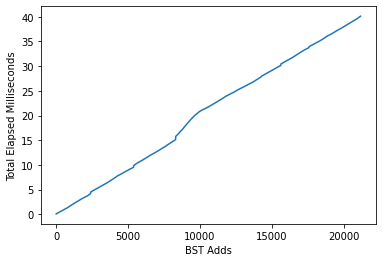

In [12]:
#q6 - how long does it take to add the loans to the tree?
uwcu_loan_tree = BST()

totals = []
time1 = time()
for loan in uwcu:
    uwcu_loan_tree.add(loan.interest_rate, loan)
    time2 = time()
    totals.append((time2 - time1) * 1000)
plt.plot(totals)
plt.xlabel("BST Adds")
plt.ylabel("Total Elapsed Milliseconds")

Text(0, 0.5, 'Milliseconds')

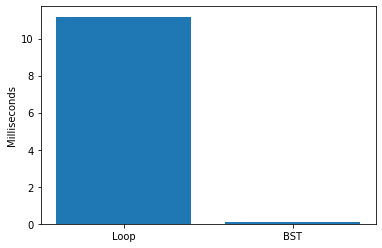

In [13]:
#q7 - how fast are tree lookups?
counter = 0
time3 = time()
for loan in uwcu:
    if loan.interest_rate == -1:
        counter += 1
        time4 = time()
loop_time = (time4 - time3) * 1000
        
time5 = time()
len(uwcu_loan_tree[-1])
time6 = time()
bst_time = (time6 - time5) * 1000

data = {"Loop": loop_time, "BST": bst_time}
x = list(data.keys())
y = list(data.values())
plt.bar(x, y)
plt.ylabel("Milliseconds")

Text(0, 0.5, 'amount')

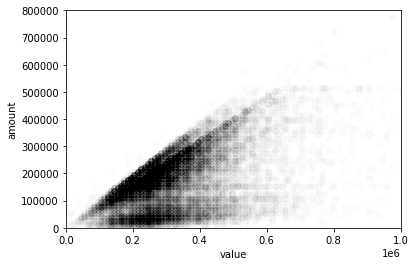

In [14]:
#q8 - what is the relationship between property value and loan amount?
property_values = []
loan_amounts = []
for properties in uwcu:
    if properties.property_value != -1 and properties.loan_amount != -1:
        property_values.append(properties.property_value)
        loan_amounts.append(properties.loan_amount)

plt.scatter(property_values, loan_amounts, alpha = 0.01, c = "black")
plt.xlim(0, 1000000)
plt.ylim(0, 800000) #do i need these by 200,000s like the example graph
plt.xlabel("value")
plt.ylabel("amount")
#plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

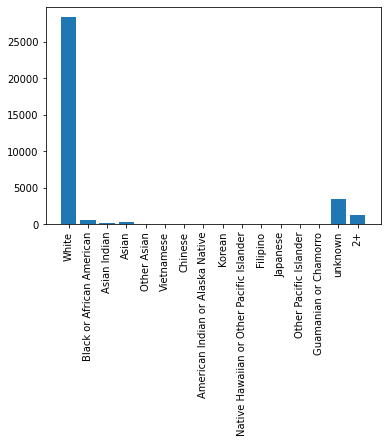

In [15]:
#q9 - what is the distribution of race for UWCU loan applicants?
applicants = []
for values in uwcu:
    for applicant in values.applicants:
        applicants.append(applicant)
        
race_dict = {}
unknown_count = 0
twoplus_count = 0
for person in applicants:
    if len(person.race) >= 2:
        twoplus_count += 1
    elif len(person.race) == 0:
        unknown_count += 1
    else:
        something = list(person.race)
        if something[0] not in race_dict:
            race_dict[something[0]] = 1
        else:
            race_dict[something[0]] += 1
race_dict['unknown'] = unknown_count
race_dict['2+'] = twoplus_count
race_dict

x = race_dict.keys()
y = race_dict.values()
plt.bar(x, y)
plt.xticks(rotation = 90)
#plt.show()

In [16]:
#q10 - how many nodes are in the tree?
uwcu_loan_tree.nodecount()

32